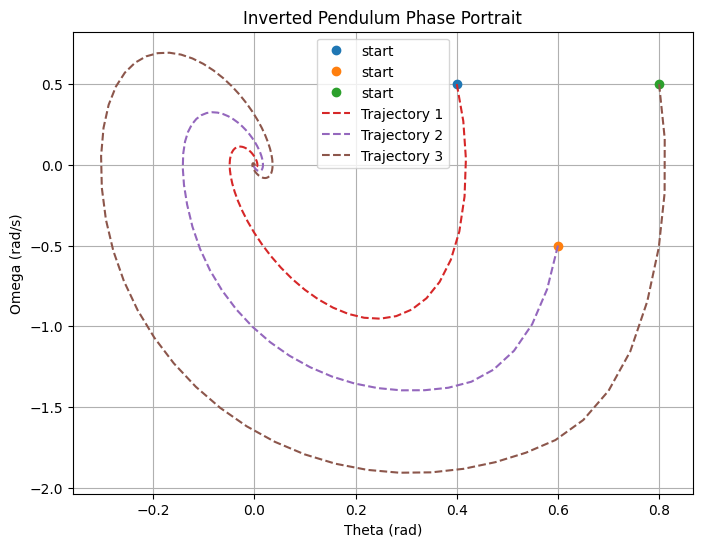

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Параметры маятника
g = 9.81     # Ускорение свободного падения, м/с^2
L = 1.0      # Длина маятника, м
m = 1.0      # Масса, кг (условно)
I = m * L**2 # Момент инерции маятника
max_u = 3  # Максимальный управляющий момент (ограничение по модулю)

# Параметры управления (простейший PD-контроллер)
Kp = 10.0
Kd = 5.0

def control_law(theta, omega):
    """
    Простейший PD-закон управления с насыщением.
    Здесь желаемое положение theta_des = 0, желаемая скорость omega_des = 0.
    """
    u = -Kp * theta - Kd * omega
    # Ограничим по модулю
    u = np.clip(u, -max_u, max_u)
    return u

def inverted_pendulum_equations(t, y):
    """
    Правые части уравнений обратного маятника:
    y[0] = theta (угол), y[1] = omega (угловая скорость).
    """
    theta, omega = y
    u = control_law(theta, omega)
    # dtheta/dt = omega
    # domega/dt = (g/L)*sin(theta) + (1/I)*u
    dtheta_dt = omega
    domega_dt = - (g / L) * np.sin(theta) + (1.0 / I) * u
    return [dtheta_dt, domega_dt]

# Зададим 10 разных начальных условий
initial_conditions = [
    (0.2 * i, 0.5 * ((-1)**i)) for i in range(2, 5)
]

# Диапазон времени моделирования
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 300)

plt.figure(figsize=(8, 6))

for i in initial_conditions:
    plt.plot(i[0], i[1], 'o', label='start')


for i, ic in enumerate(initial_conditions, start=1):
    sol = solve_ivp(
        inverted_pendulum_equations, t_span, ic, t_eval=t_eval, 
        vectorized=False, rtol=1e-6, atol=1e-8
    )
    theta_vals = sol.y[0]
    omega_vals = sol.y[1]
    plt.plot(theta_vals, omega_vals, 
             linestyle='--',
             label=f"Trajectory {i}")

plt.title("Inverted Pendulum Phase Portrait")
plt.xlabel("Theta (rad)")
plt.ylabel("Omega (rad/s)")
plt.legend(loc="best")  # Легенда на английском
plt.grid(True)
plt.show()


In [134]:
1 - np.exp(-10)

0.9999546000702375

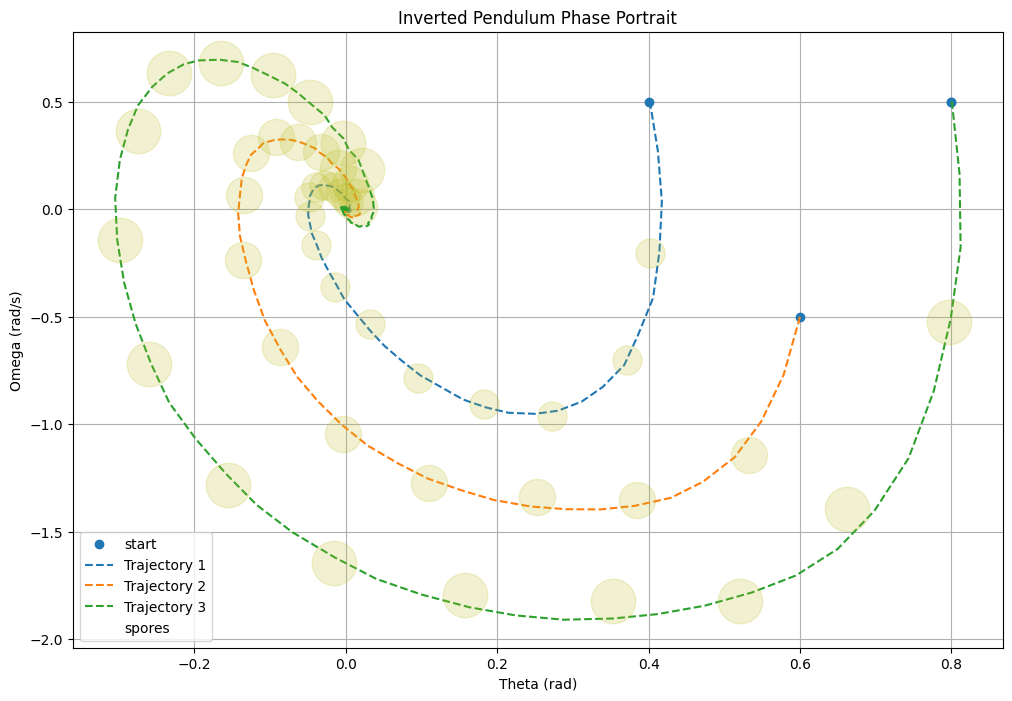

In [140]:


####################
# 33\
np.random.seed(1)

plt.figure(figsize=(12, 8))
for i in initial_conditions:
    plt.plot(i[0], i[1], 'o', color='C0')

plt.plot(i[0], i[1], 'o', color='C0', label='start')

for i, ic in enumerate(initial_conditions, start=1):
    sol = solve_ivp(
        inverted_pendulum_equations, t_span, ic, t_eval=t_eval, 
        vectorized=False, rtol=1e-6, atol=1e-8
    )
    theta_vals = sol.y[0]
    omega_vals = sol.y[1]


    st = 3
    fn = 50
    

    skeleton = np.array([theta_vals[st:fn:st], omega_vals[st:fn:st]])

    noize = np.random.normal(0, 0.0007, size=(2, len(theta_vals))) * np.linalg.norm(skeleton)**0.5

    plt.plot(theta_vals+noize[0], omega_vals+noize[1], 
             linestyle='--',
             label=f"Trajectory {i}")
    
    noize = np.random.normal(0, 0.03, size=skeleton.shape)

    sk_noize = skeleton + noize * skeleton
    
    dot_size = 15 * np.linalg.norm(skeleton)**0.5
    # alpha = 1 - np.exp(-(dot_size/50))
    alpha = 0.2
    plt.plot(sk_noize[0], sk_noize[1], 'o', markersize=dot_size, alpha=alpha, color='C8')

# plt.plot(skeleton[0], skeleton[1], 'o')

plt.plot(sk_noize[0], sk_noize[1], 'o', markersize=dot_size, alpha=0, color='C78', label='spores')

plt.title("Inverted Pendulum Phase Portrait")
plt.xlabel("Theta (rad)")
plt.ylabel("Omega (rad/s)")
plt.legend(loc="best")  # Легенда на английском
plt.grid(True)

###############################33

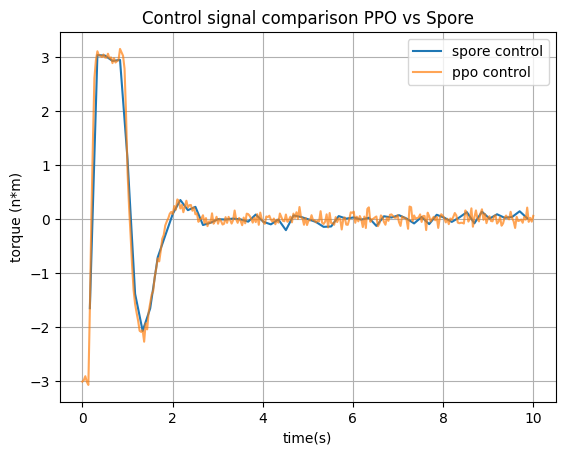

In [148]:
controls = []
for i in range(len(theta_vals)):
    controls.append(control_law(theta_vals[i], omega_vals[i]))

controls = np.array(controls)

st = 5
fn = len(controls)


skeleton = controls[st:fn:st]
time = t_eval[st:fn:st]

noize = np.random.normal(0, 0.08, size=skeleton.shape)

plt.plot(time, skeleton+noize, label='spore control')

skeleton = controls
noize = np.random.normal(0, 0.08, size=skeleton.shape)
time = t_eval

plt.plot(time, skeleton+noize, label='ppo control', alpha=0.7)


plt.title('Control signal comparison PPO vs Spore')
plt.xlabel('time(s)')
plt.ylabel('torque (n*m)')
plt.grid()
plt.legend()


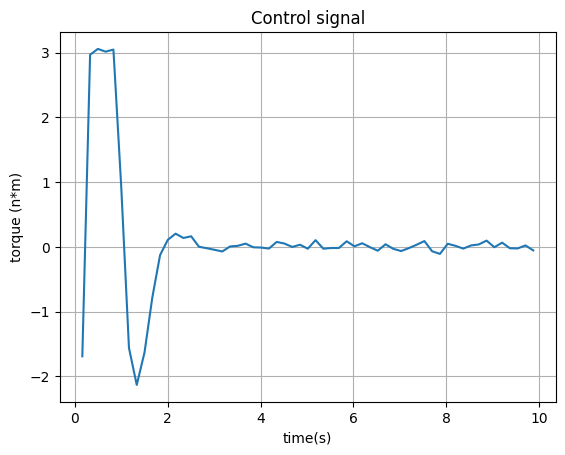

In [141]:
controls = []
for i in range(len(theta_vals)):
    controls.append(control_law(theta_vals[i], omega_vals[i]))

controls = np.array(controls)

st = 5
fn = len(controls)


skeleton = controls[st:fn:st]
time = t_eval[st:fn:st]

noize = np.random.normal(0, 0.05, size=skeleton.shape)

plt.plot(time, skeleton+noize)


plt.title('Control signal')
plt.xlabel('time(s)')
plt.ylabel('torque (n*m)')
plt.grid()


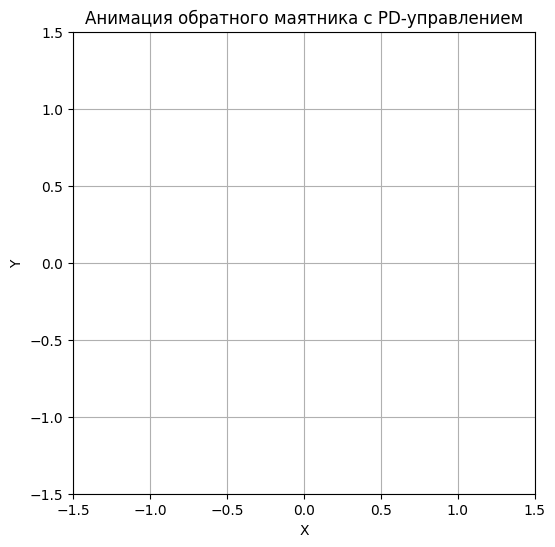

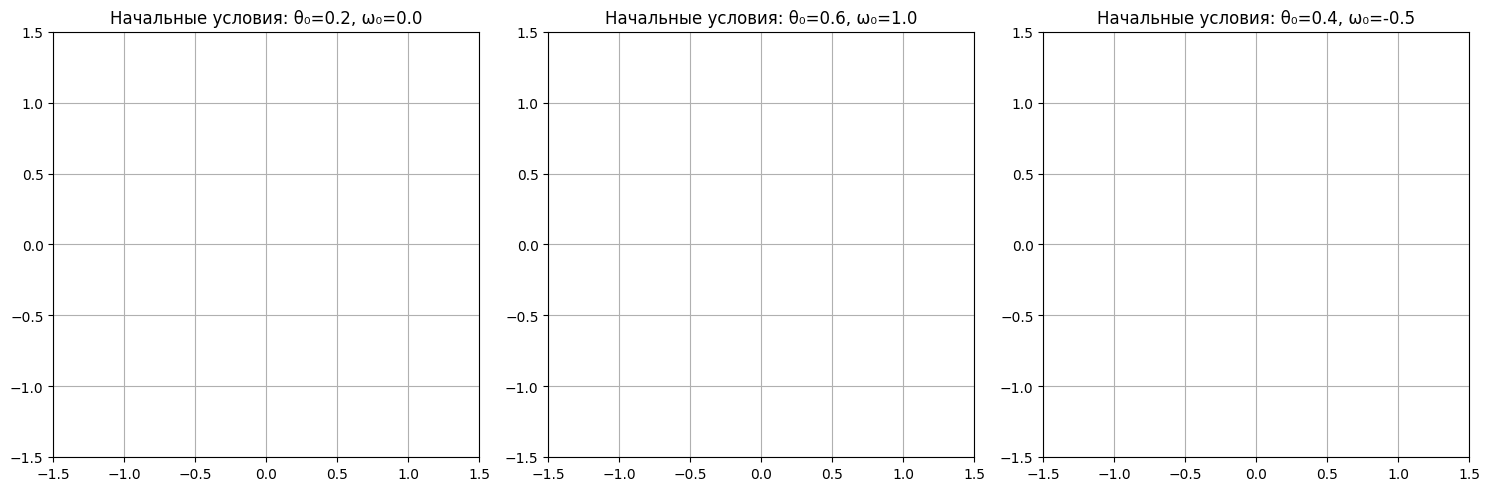

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp

# Параметры маятника
g = 9.81     # Ускорение свободного падения, м/с^2
L = 1.0      # Длина маятника, м
m = 1.0      # Масса, кг (условно)
I = m * L**2 # Момент инерции маятника
max_u = 3    # Максимальный управляющий момент (ограничение по модулю)

# Параметры управления (простейший PD-контроллер)
Kp = 10.0
Kd = 5.0

def control_law(theta, omega):
    """
    Простейший PD-закон управления с насыщением.
    Здесь желаемое положение theta_des = The desired position is 0, the desired speed omega_des = 0.
    """
    u = -Kp * theta - Kd * omega
    # Ограничим по модулю
    u = np.clip(u, -max_u, max_u)
    return u

def inverted_pendulum_equations(t, y):
    """
    Правые части уравнений обратного маятника:
    y[0] = theta (угол), y[1] = omega (угловая скорость).
    """
    theta, omega = y
    u = control_law(theta, omega)
    # dtheta/dt = omega
    # domega/dt = (g/L)*sin(theta) + (1/I)*u
    dtheta_dt = omega
    domega_dt = -(g / L) * np.sin(theta) + (1.0 / I) * u
    return [dtheta_dt, domega_dt]

# Выберем начальное условие для анимации (можно изменить на любое из списка initial_conditions)
initial_condition = (0.6, 1.0)  # Начальный угол (рад) и угловая скорость (рад/с)

# Диапазон времени моделирования
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 300)

# Решаем систему дифференциальных уравнений
sol = solve_ivp(
    inverted_pendulum_equations, t_span, initial_condition, 
    t_eval=t_eval, vectorized=False, rtol=1e-6, atol=1e-8
)

# Получаем значения угла и угловой скорости
theta_vals = sol.y[0]
omega_vals = sol.y[1]
t_vals = sol.t

# Создаем фигуру и оси для анимации
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')
ax.grid(True)
ax.set_title('Анимация обратного маятника с PD-управлением')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Инициализируем элементы, которые будем анимировать
pendulum_line, = ax.plot([], [], 'o-', lw=2, color='blue')
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
angle_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)
control_text = ax.text(0.02, 0.85, '', transform=ax.transAxes)

# Функция инициализации анимации
def init():
    pendulum_line.set_data([], [])
    time_text.set_text('')
    angle_text.set_text('')
    control_text.set_text('')
    return pendulum_line, time_text, angle_text, control_text

# Функция обновления состояния для каждого кадра анимации
def update(frame):
    # Вычисляем координаты стержня маятника для текущего угла
    # Для визуализации обратного маятника, ось Y направлена вверх,
    # поэтому используем -np.cos(theta) для Y
    theta = theta_vals[frame]
    omega = omega_vals[frame]
    
    # Координаты шарнира (верхняя точка, где закреплен маятник)
    x0, y0 = 0, 0
    
    # Координаты конца маятника
    x1 = L * np.sin(theta)
    y1 = -L * np.cos(theta)  # Минус, потому что в обратном маятнике ноль - это верхнее положение
    
    pendulum_line.set_data([x0, x1], [y0, y1])
    
    # Обновляем текстовую информацию
    time_text.set_text(f'Время: {t_vals[frame]:.2f} с')
    angle_text.set_text(f'Угол: {np.degrees(theta):.2f}°')
    
    # Вычисляем текущее управляющее воздействие
    u = control_law(theta, omega)
    control_text.set_text(f'Управление: {u:.2f} Н⋅м')
    
    return pendulum_line, time_text, angle_text, control_text

# Создаем анимацию
ani = FuncAnimation(fig, update, frames=len(t_vals),
                    init_func=init, blit=True, interval=33)

# Если вы хотите сохранить анимацию в файл
# ani.save('pendulum_animation.mp4', writer='ffmpeg', fps=30)

plt.show()

# Для анимации нескольких начальных условий, можно использовать такой код:

# Зададим несколько различных начальных условий
initial_conditions = [
    (0.2, 0),      # Небольшое отклонение без начальной скорости
    (0.6, 1.0),    # Среднее отклонение с положительной скоростью
    (0.4, -0.5)    # Малое отклонение с отрицательной скоростью
]

# Создаем фигуру с несколькими подграфиками
fig, axes = plt.subplots(1, len(initial_conditions), figsize=(15, 5))

# Словарь для хранения результатов симуляций и элементов анимации
animations = []

for i, (ax, ic) in enumerate(zip(axes, initial_conditions)):
    # Решаем систему для текущих начальных условий
    sol = solve_ivp(
        inverted_pendulum_equations, t_span, ic, 
        t_eval=t_eval, vectorized=False, rtol=1e-6, atol=1e-8
    )
    
    # Настраиваем график
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal')
    ax.grid(True)
    ax.set_title(f'Начальные условия: θ₀={ic[0]:.1f}, ω₀={ic[1]:.1f}')
    
    # Инициализируем элементы для анимации
    pendulum_line, = ax.plot([], [], 'o-', lw=2, color='blue')
    time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=8)
    
    # Сохраняем данные и элементы для анимации
    animations.append({
        'ax': ax,
        'line': pendulum_line,
        'time_text': time_text,
        'theta_vals': sol.y[0],
        'omega_vals': sol.y[1],
        't_vals': sol.t
    })

# Функция инициализации
def init_multi():
    for anim in animations:
        anim['line'].set_data([], [])
        anim['time_text'].set_text('')
    return [anim['line'] for anim in animations] + [anim['time_text'] for anim in animations]

# Функция обновления для каждого кадра
def update_multi(frame):
    elements = []
    for anim in animations:
        theta = anim['theta_vals'][frame]
        
        # Координаты
        x0, y0 = 0, 0
        x1 = L * np.sin(theta)
        y1 = -L * np.cos(theta)
        
        anim['line'].set_data([x0, x1], [y0, y1])
        anim['time_text'].set_text(f't: {anim["t_vals"][frame]:.1f}s')
        
        elements.append(anim['line'])
        elements.append(anim['time_text'])
    
    return elements

# Создаем анимацию
ani_multi = FuncAnimation(fig, update_multi, frames=len(t_eval),
                         init_func=init_multi, blit=True, interval=33)

plt.tight_layout()
# ani_multi.save('pendulums_animation.mp4', writer='ffmpeg', fps=30)
plt.show()
